### Step 1: Importing Libraries and Loading Data
We will import the necessary libraries such as numpy, matplotlib and sklearn. We will load IRIS Dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

### Step 2: Semi-Supervised Setup (Mask Labels)
We will setup the semi-supervised working,

- labels is what we pass to the algorithm (contains -1 for unlabeled).
- mask is a boolean array indicating which points keep their labels.
- labels[~mask] = -1 — scikit-learn convention: unlabeled = -1.
- Print helps readers see how many labels remain (important when describing experiments).

In [4]:
labels = np.copy(y)
rng = np.random.RandomState(42)
mask = rng.rand(len(y)) < 0.1
labels[~mask] = -1
print(f"Labeled: {np.sum(mask)}, Unlabeled: {np.sum(~mask)}")

Labeled: 18, Unlabeled: 132


### Step 3: Train a Graph-Based Model (Label Propagation)
We will train a graph-based model,

- LabelPropagation() builds a graph on X (similarities) and propagates labels from labeled nodes to unlabeled ones.
- fit(X, labels) performs the label diffusion — no separate .predict() needed for transduction.

In [5]:
model = LabelPropagation()
model.fit(X, labels)

,kernel,'rbf'
,gamma,20
,n_neighbors,7
,max_iter,1000
,tol,0.001
,n_jobs,None


### Step 4: Get Transduced Labels and Evaluate
Labels are assigned to all points,

- model.transduction_ gives the inferred labels for every sample (including previously unlabeled).
- Evaluate both on the small originally-labeled subset (y[mask]) and on the true labels (y) to show how well propagation recovered the full labeling.
- accuracy_score is a simple, interpretable metric.

In [6]:
y_pred = model.transduction_
acc_labeled = accuracy_score(y[mask], y_pred[mask])
acc_overall = accuracy_score(y, y_pred)
print(f"Acc (on original labeled subset): {acc_labeled:.3f}")
print(f"Acc (overall after propagation): {acc_overall:.3f}")

Acc (on original labeled subset): 1.000
Acc (overall after propagation): 0.707


### Step 5: Visualize
We will visualize results:

- Left plot shows the few labeled examples (colored) against unlabeled (gray).
- Right plot shows model’s assigned labels for every point after propagation.
- Removing edgecolor avoids common scatter warnings.

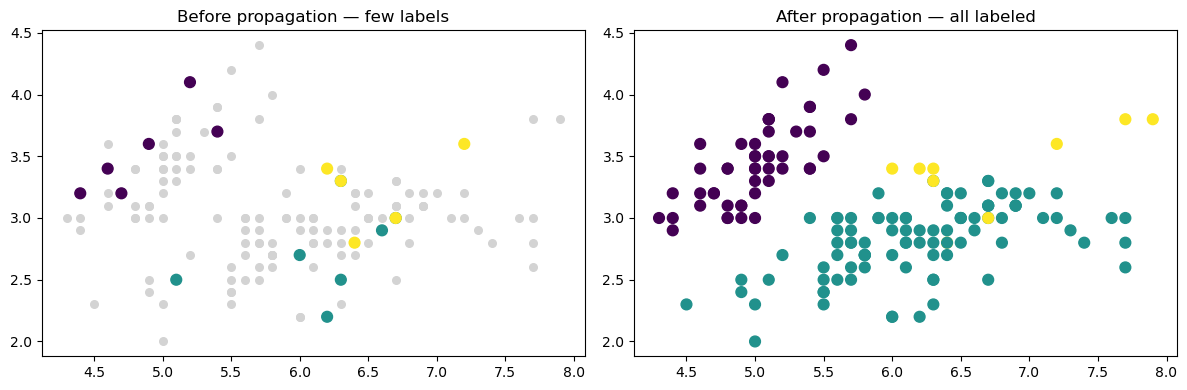

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X[:, 0], X[:, 1], c='lightgray', s=30)
ax[0].scatter(X[mask, 0], X[mask, 1], c=y[mask], cmap='viridis', s=60)
ax[0].set_title("Before propagation — few labels")

ax[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=60)
ax[1].set_title("After propagation — all labeled")

plt.tight_layout()
plt.show()

As we can see in the result that the model was able to classify images into the categories or labels after successful operations of semi-supervised learning.